# Matplotlib Visualizations

[Additional Samples](https://matplotlib.org/tutorials/introductory/sample_plots.html)

First, establish the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Interface types:
Matplotlib supports two primary ways to use the library:
- Explicitly create figures and axes, and call methods on them (the "object-oriented (OO) style").
- Rely on pyplot to automatically create and manage the figures and axes, and use pyplot functions for plotting.

### OO Sample line plot

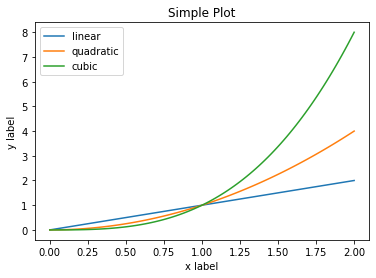

In [2]:
x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.  

# Note the ";" add the very last sentence prevents messages such as 
# "<matplotlib.axes._subplots.AxesSubplot at 0x7fe9f98be9e8>" from appearing 

### pyplot style

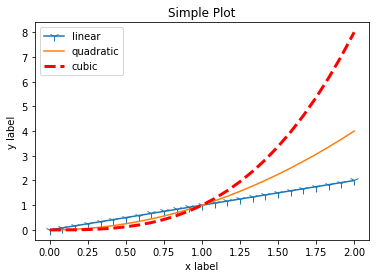

In [3]:
x = np.linspace(0, 2, 25)

plt.plot(x, x, label='linear', marker='1',markersize=10)
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic',c='#FF0000', linewidth=3,linestyle='dashed')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend(loc="best")

plt.show()

Additiionally, pandas support creating plots directly from Series and DataFrame objects.  
The plot() method is a wrapper around plt.plot() with some basic defaualts provided.

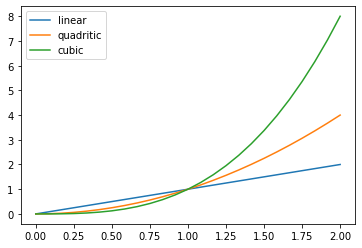

In [4]:
data = np.array([x, x**2, x**3])
df = pd.DataFrame(data=data.transpose(), index=x, columns = ['linear','quadritic','cubic'])
df.plot();


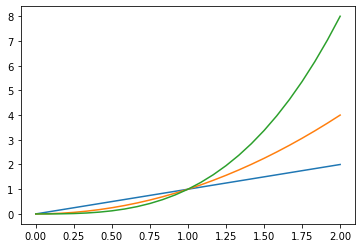

In [5]:
plt.plot(df);

## Produce charts from the mpg dataset
load the [mpg dataset](https://ggplot2.tidyverse.org/reference/mpg.html) Source: https://github.com/tidyverse/ggplot2/blob/master/data-raw/mpg.csv

In [6]:
try:
  import google.colab
  data_file_prefix = "https://raw.githubusercontent.com/slankas/VisualizationCode/master/Python/"
  import plotly.io as pio
  pio.renderers.default = 'colab'
except:
  data_file_prefix = ""


mpg = pd.read_csv(data_file_prefix + "mpg.csv")

## Quick Exploratory Data Analysis

In [7]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [8]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [9]:
mpg.describe(include='all')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
count,234,234,234.000000,234.000000,234.000000,234,234,234.000000,234.000000,234,234
unique,15,38,NaN,NaN,NaN,10,3,NaN,NaN,5,7
top,dodge,caravan 2wd,NaN,NaN,NaN,auto(l4),f,NaN,NaN,r,suv
freq,37,11,NaN,NaN,NaN,83,106,NaN,NaN,168,62
mean,NaN,NaN,3.471795,2003.500000,5.888889,NaN,NaN,16.858974,23.440171,NaN,NaN
std,NaN,NaN,1.291959,4.509646,1.611534,NaN,NaN,4.255946,5.954643,NaN,NaN
min,NaN,NaN,1.600000,1999.000000,4.000000,NaN,NaN,9.000000,12.000000,NaN,NaN
25%,NaN,NaN,2.400000,1999.000000,4.000000,NaN,NaN,14.000000,18.000000,NaN,NaN
50%,NaN,NaN,3.300000,2003.500000,6.000000,NaN,NaN,17.000000,24.000000,NaN,NaN
75%,NaN,NaN,4.600000,2008.000000,8.000000,NaN,NaN,19.000000,27.000000,NaN,NaN


## Visualizing Amounts

### Bar Plots
Bar charts are useful to display counts and other values associated with categorical data.

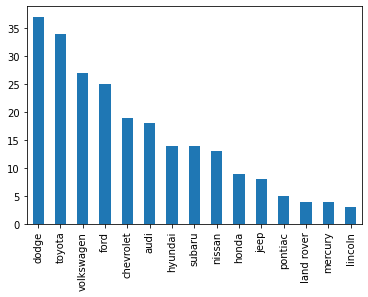

In [10]:
mpg['manufacturer'].value_counts().plot(kind='bar');  # uses the pandas wrapper

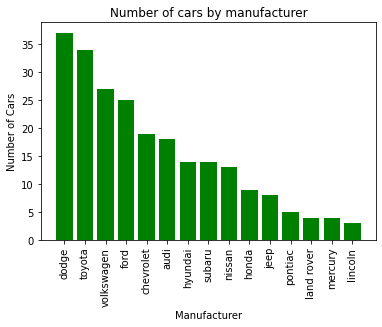

In [11]:
m_counts = mpg['manufacturer'].value_counts()

plt.bar(m_counts.index, m_counts, color='green')
plt.xlabel("Manufacturer")
plt.ylabel("Number of Cars")
plt.title("Number of cars by manufacturer")
plt.xticks([i for i, _ in enumerate( m_counts.index)], m_counts.index, rotation='vertical')


plt.show()

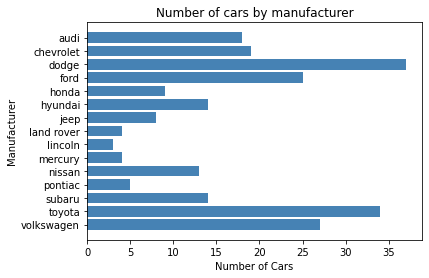

In [12]:
m_counts = mpg['manufacturer'].value_counts().sort_index(ascending=False)   # sort manufacturers descending to put "A"s on top

fig, ax = plt.subplots()  # Create a figure and an axes.
ax.barh(m_counts.index, m_counts, color='steelblue')
ax.set_ylabel("Manufacturer")
ax.set_xlabel("Number of Cars")
ax.set_title("Number of cars by manufacturer")


plt.show()

### Grouped Bar Chart

This can be manually produced from a 2 or more series of data: [matplotlib group bar chart](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/barchart.html)


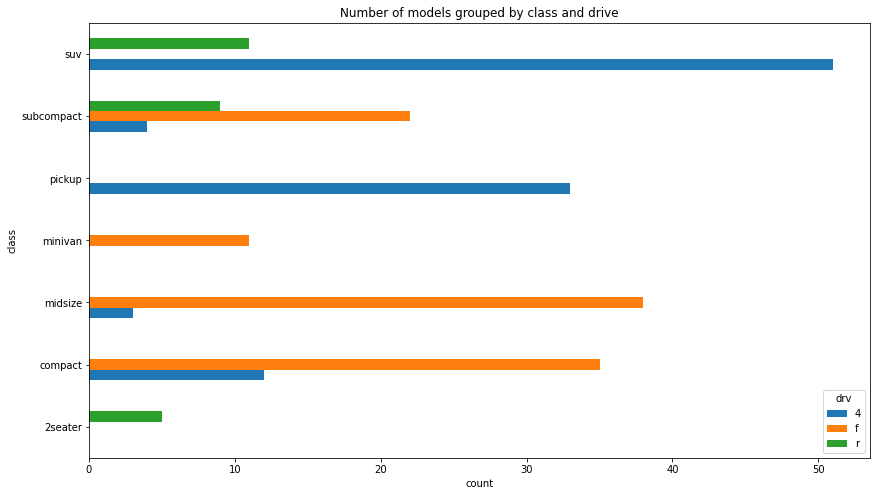

In [13]:
ax = mpg.groupby(['drv','class'])['drv'].count().unstack(0).plot.barh(title="Number of models grouped by class and drive", figsize=(14,8))
ax.set_xlabel("count")
ax.set_ylabel("class");

### Stacked Bar Chart

https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py shows how to do this manually with setting the bottom of the "stacked" bars

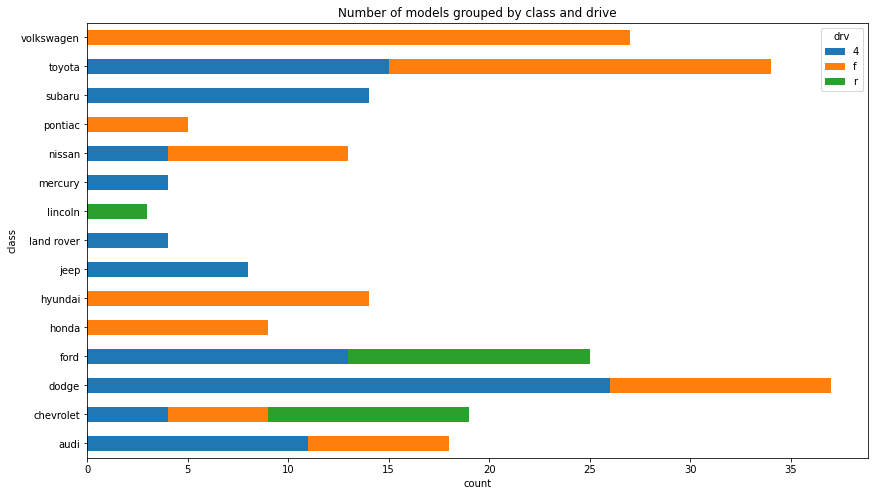

In [14]:
ax = mpg.groupby(['drv','manufacturer'])['drv'].count().unstack(0).plot.barh(stacked=True,title="Number of models grouped by class and drive", figsize=(14,8))
ax.set_xlabel("count")
ax.set_ylabel("class");

### Dot Plot
This is really just a scatter plot, but using a categorical variable for the y-axis

In [15]:
averageCityMPG = mpg.groupby('manufacturer')['cty'].mean().sort_values()

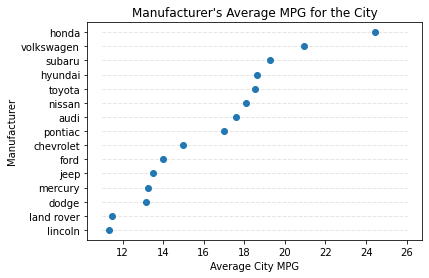

In [16]:
plt.scatter(averageCityMPG,averageCityMPG.index)
plt.xlabel('Average City MPG')
plt.ylabel('Manufacturer')

# add light dashed line
plt.hlines(y=averageCityMPG.index, xmin=11, xmax=26, color='gray', alpha=0.2, linewidth=1, linestyles='dashed')

plt.title("Manufacturer's Average MPG for the City")

plt.show()

## Histogram

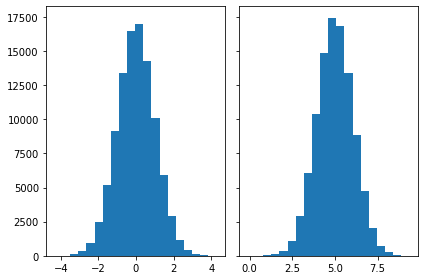

In [17]:
N_points = 100000
n_bins = 20

# Generate a normal distribution, center at x=0 and y=5
x = np.random.randn(N_points)
y = .4 * x + np.random.randn(100000) + 5

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# Set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins);

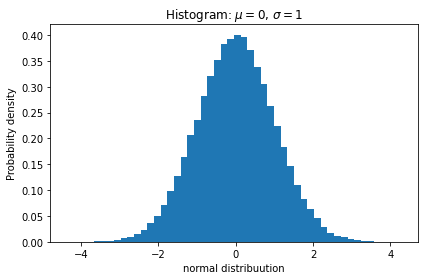

In [18]:
num_bins = 50
fig, ax = plt.subplots()
n, bins, patches = ax.hist(x, num_bins, density=1)
ax.set_xlabel('normal distribuution')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram: $\mu=0$, $\sigma=1$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

### Scatterplots

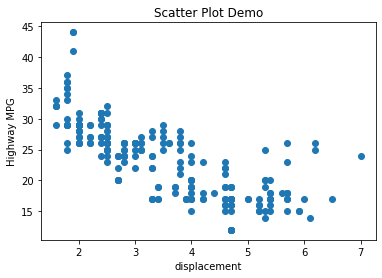

In [19]:
plt.scatter(mpg["displ"],mpg["hwy"])

plt.xlabel('displacement')
plt.ylabel('Highway MPG')

plt.title("Scatter Plot Demo")


plt.show();

Matplotlib does not provide an easy mechanism for mapping additional aesthetics, so we'll quickly switch to seaborn to demonstrate additional ones.

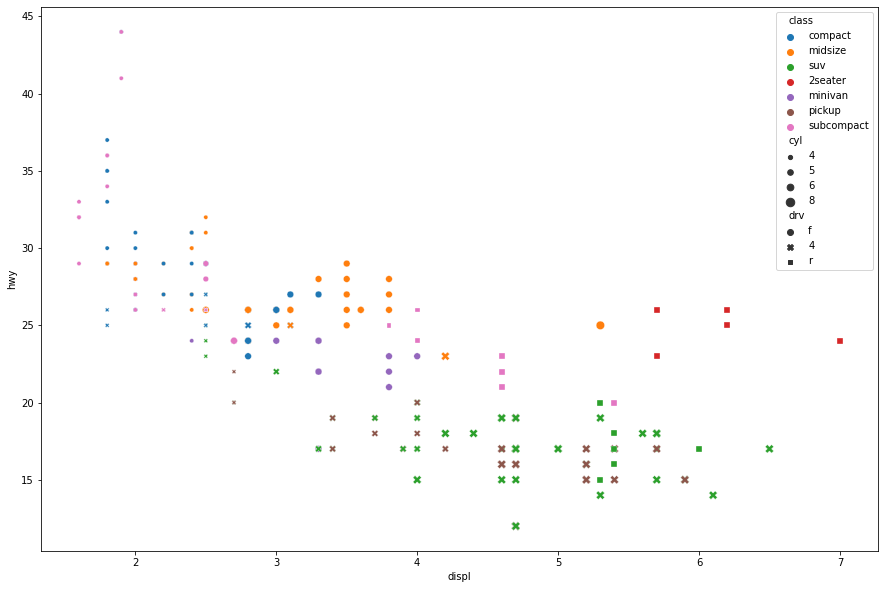

In [20]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.scatterplot(data=mpg, x= "displ", y="hwy", hue="class", style="drv",size="cyl");

### Boxplots

Text(0.5, 0.98, '')

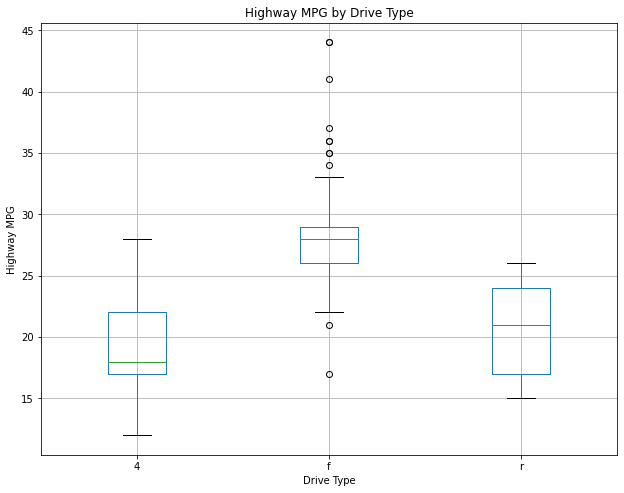

In [21]:
mpg.boxplot(column=['hwy'], by=['drv'],figsize=(10,8))
plt.ylabel("Highway MPG")
plt.xlabel("Drive Type");
plt.title("Highway MPG by Drive Type")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")

## Review Activities
1. Repeat the grouped bar chart, but put the drv on the y axis.  Which chart version makes more sense?
2. Perform additional scatter plots - use either "hwy" or "cty" as the y axis, but vary the x axis.
3. For each manufacturer, produce a dot plot with their average hwy mpg.  Start the x-axis at zero.  Hint: plt.xlim(xmin=0)